# **The Problem Description:** 

---



Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. 

More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, secularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. 

In this project we will use dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

## Data Description:

---



The Street View House Numbers (SVHN) Dataset SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images. 

### Link to the dataset: 

https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing

# **Steps and tasks**

---



### 1. Load Dataset
### 2. Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)
### 3. Data fetching and understand the train/val/test splits. (15 points)

In [1]:
# Loading necessary libraries 
import h5py
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

%tensorflow_version 2.x
import tensorflow as tf
tf.__version__


'2.2.0'

In [2]:
# Initialize the random number generator
import random
random.seed(10)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Mounting the google drive 

from google.colab import drive
drive.mount('/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/


### Load the dataset
As I am using google colab, I have to mount the google drive to load the data file

In [4]:
filename = "/gdrive/My Drive/AIML/Labs/NNData/SVHN_single_grey1.h5"
h5f = h5py.File(filename, 'r')

In [5]:
# Listing the contents of H5 file
list(h5f)

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

Reference: Train Test validate Data

https://www.youtube.com/watch?v=Zi-0rlM4RDs

In [6]:
# Load the training test and validation set

X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test  = h5f['X_test'][:]
y_test  = h5f['y_test'][:]

X_val   = h5f['X_val'][:]
y_val   = h5f['y_val'][:]

# Close this file
h5f.close()

In [7]:
#Print the shape of all the datas available.
print ('X_train Shape: ', X_train.shape)
print ('y_train Shape: ', y_train.shape)
print ('X_val Shape: ', X_val.shape)
print ('y_val Shape: ', y_val.shape)
print ('X_test Shape: ', X_test.shape)
print ('y_test Shape: ', y_test.shape)

X_train Shape:  (42000, 32, 32)
y_train Shape:  (42000,)
X_val Shape:  (60000, 32, 32)
y_val Shape:  (60000,)
X_test Shape:  (18000, 32, 32)
y_test Shape:  (18000,)


## Visualizing the dataset


### Training Set

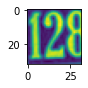

Label for the Image 2


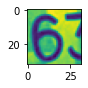

Label for the Image 6


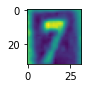

Label for the Image 7


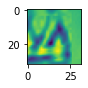

Label for the Image 4


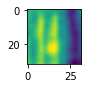

Label for the Image 4


In [8]:
#Print First 5 image from Training Set
for i in range(0,5):
  plt.figure(figsize=(1, 1))
  plt.imshow(X_train[i])
  plt.show(True)
  print("Label for the Image",y_train[i])

### Validation Set

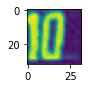

Label for the Image 0


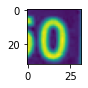

Label for the Image 0


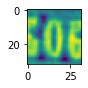

Label for the Image 0


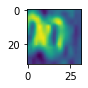

Label for the Image 0


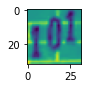

Label for the Image 0


In [9]:
#Print First 5 image from Validation Set
for i in range(0,5):
  plt.figure(figsize=(1, 1))
  plt.imshow(X_val[i])
  plt.show(True)
  print("Label for the Image",y_val[i])

## Observation

---



**Validation Set** images are of same label from 0 to 5, variation is very less, So we need to select the data randomly otherwise it will have data sparseness.

Printing list of 5 random numbers
[37447, 2135, 28107, 31625, 37885]


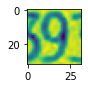

Label for the Image 9


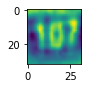

Label for the Image 0


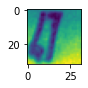

Label for the Image 7


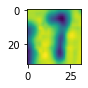

Label for the Image 7


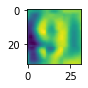

Label for the Image 9


In [10]:
import random

randomList = []
# Set a length of the list to 10
for i in range(0, 5):
    # any random numbers from 0 to 1000
    randomList.append(random.randint(0, 60000))

print("Printing list of 5 random numbers")
print(randomList)

#Print First 5 image from Validation Set
for i in randomList:
  plt.figure(figsize=(1, 1))
  plt.imshow(X_val[i])
  plt.show(True)
  print("Label for the Image",y_val[i])

### Test Set

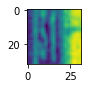

Label for the Image 1


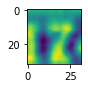

Label for the Image 7


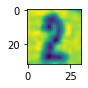

Label for the Image 2


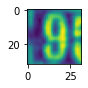

Label for the Image 9


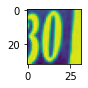

Label for the Image 0


In [11]:
#Print First 5 image from test Set
for i in range(0,5):
  plt.figure(figsize=(1, 1))
  plt.imshow(X_test[i])
  plt.show(True)
  print("Label for the Image",y_test[i])

## Observation:

---
1. There are 3 Set of Data, Train, Validate and Test Set
2. **Training Set** - 42000 Images of 32*32 Pixel are with same no. of Labeld data
3. **Validation Set** - 60000 Images of 32*32 Pixel are with same no. of Labeld data
4. **Test Set** - 18000 Images of 32*32 Pixel are with same no. of Labeld data
5. **Validation Set** Images are in the similar label from 0 to 5 for different ranges, variation is very less, So picked up random sample to verify the vaidation Dataset.









### For the basic Image Classification pipeline and the data-driven approach (train/predict stages), Let's use k-Nearest Neighbor (kNN) classifier

First lets convert the 32*32 image to one dimesion of 1024

In [12]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
print(X_test.shape)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1] * X_val.shape[2])
print(X_val.shape)


(42000, 1024)
(18000, 1024)
(60000, 1024)


Print the shape of the Images after conversion to One Dimesion.

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 1024)
(42000,)
(60000, 1024)
(60000,)
(18000, 1024)
(18000,)


## Observation

---



**Visualizing the Distribution of Training, Validation and Test Set**, To Ensure there is no class imballance while performing the KNN

Unique Set of Data at Train Set:  [0 1 2 3 4 5 6 7 8 9]


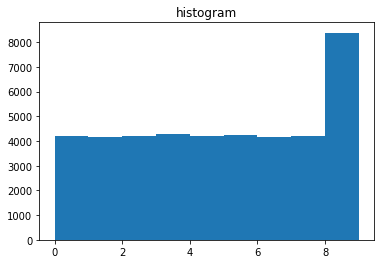

In [14]:
from matplotlib import pyplot as plt 
import numpy as np  

print('Unique Set of Data at Train Set: ',np.unique(y_train))
plt.hist(y_train, bins = [0,1,2,3,4,5,6,7,8,9]) 
plt.title("histogram") 
plt.show()

Unique Set of Data at Test Set:  [0 1 2 3 4 5 6 7 8 9]


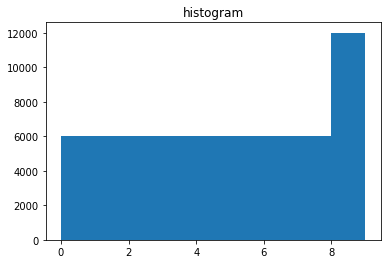

In [15]:
from matplotlib import pyplot as plt 
import numpy as np  
print('Unique Set of Data at Test Set: ',np.unique(y_val))
plt.hist(y_val, bins = [0,1,2,3,4,5,6,7,8,9],) 
plt.title("histogram") 
plt.show()

Unique Set of Data at Test Set:  [0 1 2 3 4 5 6 7 8 9]


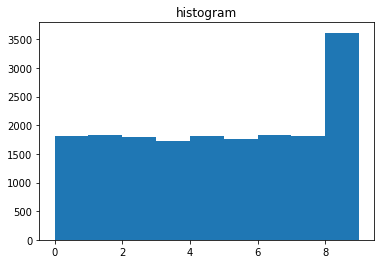

In [16]:
from matplotlib import pyplot as plt 
import numpy as np  
print('Unique Set of Data at Test Set: ',np.unique(y_test))
plt.hist(y_test, bins = [0,1,2,3,4,5,6,7,8,9],) 
plt.title("histogram") 
plt.show()

### Observation
Almost similar distribution in Train, Test and Validation Set

### Prepare the KNN Model

In [17]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 3,algorithm='brute')

In [18]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [19]:
# Find the accuracy score for Training data
score = NNH.score(X_train, y_train)
print(score)

0.6996904761904762


In [20]:
# Find the accuracy score for val data
score = NNH.score(X_val, y_val)
print(score)

0.6283166666666666


In [21]:
predicted_KNN = NNH.predict(X_val)

In [22]:
from sklearn import metrics

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc, roc_curve

metrics.accuracy_score(y_val,predicted_KNN)

0.6283166666666666

### Print the classification metric report for validation set of KNN Model

In [23]:
from sklearn.metrics import classification_report

target_names = ['0', '1', '2','3','4','5','6','7','8','9']

print(classification_report(y_val, predicted_KNN,target_names=target_names))

              precision    recall  f1-score   support

           0       0.47      0.85      0.61      6000
           1       0.51      0.85      0.64      6000
           2       0.64      0.72      0.67      6000
           3       0.57      0.60      0.58      6000
           4       0.73      0.69      0.71      6000
           5       0.67      0.51      0.58      6000
           6       0.69      0.48      0.57      6000
           7       0.88      0.67      0.76      6000
           8       0.72      0.43      0.54      6000
           9       0.80      0.48      0.60      6000

    accuracy                           0.63     60000
   macro avg       0.67      0.63      0.63     60000
weighted avg       0.67      0.63      0.63     60000



In [24]:
#Finding the optimal K
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 3-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
    scores = cross_val_score(knn, X_val, y_val, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())
    print("for k = ",k,", Accuracy = ",cv_scores[-1])

for k =  1 , Accuracy =  0.44093333333333334
for k =  3 , Accuracy =  0.44461666666666666
for k =  5 , Accuracy =  0.4740166666666667
for k =  7 , Accuracy =  0.48464999999999997
for k =  9 , Accuracy =  0.49219999999999997
for k =  11 , Accuracy =  0.49751666666666666
for k =  13 , Accuracy =  0.5008833333333333
for k =  15 , Accuracy =  0.5055166666666667
for k =  17 , Accuracy =  0.5089833333333333
for k =  19 , Accuracy =  0.5087833333333334
for k =  21 , Accuracy =  0.5102166666666667
for k =  23 , Accuracy =  0.511
for k =  25 , Accuracy =  0.51105
for k =  27 , Accuracy =  0.5110833333333332
for k =  29 , Accuracy =  0.5118
for k =  31 , Accuracy =  0.51295
for k =  33 , Accuracy =  0.5132
for k =  35 , Accuracy =  0.5141333333333333
for k =  37 , Accuracy =  0.5153500000000001
for k =  39 , Accuracy =  0.5146833333333333
for k =  41 , Accuracy =  0.5146166666666666
for k =  43 , Accuracy =  0.5143833333333333
for k =  45 , Accuracy =  0.5130333333333333
for k =  47 , Accuracy =

The optimal number of neighbors is 37


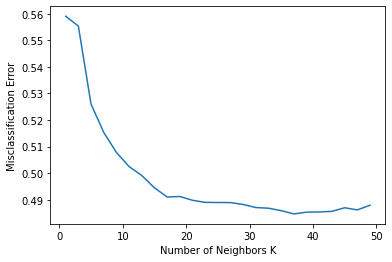

In [25]:
from matplotlib import pyplot as plt
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

lstneighbors = list(filter(lambda x: x % 2 != 0, myList))

# determining best k
optimal_k = lstneighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(lstneighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [26]:
#Lets build the Knn model with optiomal K 

neigh = KNeighborsClassifier(n_neighbors=optimal_k,algorithm='brute')
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=37, p=2,
                     weights='uniform')

In [27]:
# Find the accuracy score for Training data
score = NNH.score(X_train, y_train)
print(score)

0.6996904761904762


In [28]:
# Find the accuracy score for val data
score = NNH.score(X_val, y_val)
print(score)

0.6283166666666666


In [29]:
#Get the accuracy score for test data
NNH.score(X_test, y_test)

0.4617777777777778

In [30]:
# Predicting only for first 300 data rows to reduce execution time
predicted_KNN = NNH.predict(X_test)

In [31]:
from sklearn import metrics

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc, roc_curve

metrics.accuracy_score(y_test,predicted_KNN)

0.4617777777777778

## Test

---

**Let's Verify** few Data for Test on Prediction and Actual Before going for Accuracy Score

In [32]:
#Predicted Data
predicted_KNN[0:10]

array([4, 7, 2, 9, 0, 9, 1, 3, 1, 4], dtype=uint8)

In [33]:
#Actual Data
y_test[0:10]

array([1, 7, 2, 9, 0, 9, 1, 8, 4, 4], dtype=uint8)

In [34]:
from sklearn.metrics import classification_report

target_names = ['0', '1', '2','3','4','5','6','7','8','9']

print(classification_report(y_test, predicted_KNN,target_names=target_names))

              precision    recall  f1-score   support

           0       0.34      0.68      0.46      1814
           1       0.40      0.71      0.52      1828
           2       0.49      0.54      0.51      1803
           3       0.35      0.38      0.36      1719
           4       0.60      0.56      0.58      1812
           5       0.45      0.32      0.37      1768
           6       0.48      0.31      0.38      1832
           7       0.78      0.55      0.64      1808
           8       0.45      0.25      0.32      1812
           9       0.60      0.32      0.41      1804

    accuracy                           0.46     18000
   macro avg       0.49      0.46      0.46     18000
weighted avg       0.50      0.46      0.46     18000



## Observation

---

1. Overall **Accuracy is very poor 46%** for KNN even started with **K-fold=3 and Optimal K=37 Hyperparameter** set.

2. The Data Selected for Train, Validate and Test All are **having image Labeled 0-9**.

3. out of 10 test data (***1***, 7, 2, 9, 0, 9, 1, ***8***, ***4***, 4) 7 prediction is Correct (4, 7, 2, 9, 0, 9, 1, 3, 1, 4).



# 4. Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) (25 points)

Reference: https://faroit.com/keras-docs/2.0.6/getting-started/sequential-model-guide/

In [91]:
from keras.models import Sequential, Model 
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, Dense

In [92]:
filename = "/gdrive/My Drive/AIML/Labs/NNData/SVHN_single_grey1.h5"
h5f = h5py.File(filename, 'r')

X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test  = h5f['X_test'][:]
y_test  = h5f['y_test'][:]

X_val   = h5f['X_val'][:]
y_val   = h5f['y_val'][:]

h5f.close();

### Print shape of data and number of images
- print shape of X_train, X_val, X_test
- print number of images in X_train
- print number of images in X_val
- print number of images in X_test

In [110]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

print("Images in X_train:", X_train.shape[0])
print("Images in X_val:", X_val.shape[0])
print("Images in X_test:", X_test.shape[0])

X_train shape: (42000, 32, 32)
X_val shape: (60000, 32, 32)
X_test shape: (18000, 32, 32)
Images in X_train: 42000
Images in X_val: 60000
Images in X_test: 18000


### Normalize data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes with 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train, X_val and X_test

In [94]:
## normalize inputs from 0-255 to 0-1
X_train = X_train/255.0
X_test =X_test /255.0
X_val =X_val /255.0

### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train, y_val and y_test
- number of classes: 10
- we are doing this to use categorical_crossentropy as loss

In [95]:
from tensorflow.keras.utils import to_categorical

# Convering to One Hot Vectors
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)


### Let's see one example after one-hot encoding

Label:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


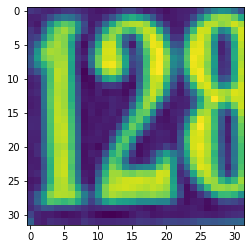

In [96]:
print("Label: ", y_train[0])
plt.imshow(X_train[0].reshape(32,32))

### Building the NN 
- Define the layers of model for NN Classification

### Initialize a Sequential model
- Define a Sequential model
- Add 2 hidden layers of 200 and 100
- Add a output layer
- Apply SGD with learning rate =.01


In [97]:
#Initialize model, reshape
modelNN = tf.keras.models.Sequential()
modelNN.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Add 1st hidden layer
modelNN.add(tf.keras.layers.Dense(200 , activation='relu'))

#Add 2nd hidden layer
modelNN.add(tf.keras.layers.Dense(100 , activation='relu'))

#Add OUTPUT layer
modelNN.add(tf.keras.layers.Dense(10 , activation='softmax'))

### Compile the model
- loss: "categorical_crossentropy"
- metrics: "accuracy"
- optimizer: "SGD"

In [98]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)

#Compile the model
modelNN.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [99]:
modelNN.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_9 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 200)               205000    
_________________________________________________________________
dense_28 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1010      
Total params: 226,110
Trainable params: 226,110
Non-trainable params: 0
_________________________________________________________________


### Training the NN 

Fit the model to the SVHN dataset
- Use early stopping
- fit the model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 10
    - give validation data - testing features and labels

In [100]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.001)

modelNN_output = modelNN.fit(X_train , y_train, batch_size=200, epochs=100, validation_data=(X_val, y_val), verbose=1, callbacks=[callback])

Epoch 1/100
210/210 [==============================] - 3s 13ms/step - loss: 2.3004 - accuracy: 0.1125 - val_loss: 2.2864 - val_accuracy: 0.1317
Epoch 2/100
210/210 [==============================] - 3s 13ms/step - loss: 2.2780 - accuracy: 0.1467 - val_loss: 2.2669 - val_accuracy: 0.1632
Epoch 3/100
210/210 [==============================] - 3s 12ms/step - loss: 2.2577 - accuracy: 0.1838 - val_loss: 2.2446 - val_accuracy: 0.2254
Epoch 4/100
210/210 [==============================] - 3s 12ms/step - loss: 2.2330 - accuracy: 0.2304 - val_loss: 2.2194 - val_accuracy: 0.2412
Epoch 5/100
210/210 [==============================] - 3s 13ms/step - loss: 2.2026 - accuracy: 0.2722 - val_loss: 2.1850 - val_accuracy: 0.2933
Epoch 6/100
210/210 [==============================] - 3s 13ms/step - loss: 2.1660 - accuracy: 0.3125 - val_loss: 2.1440 - val_accuracy: 0.3221
Epoch 7/100
210/210 [==============================] - 3s 13ms/step - loss: 2.1208 - accuracy: 0.3474 - val_loss: 2.0952 - val_accuracy:

Let's evaluate this model

In [101]:
score = modelNN.evaluate(X_test,y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

563/563 [==============================] - 1s 2ms/step - loss: 1.0456 - accuracy: 0.6880
Test loss: 1.045609712600708
Test accuracy: 0.6880000233650208


## Observations:
#### With SGD, the accuray of the model for Training Data and Validation data is arround 69%, For Test Data also Test Accuracy is arroung 68.8%, Almost same to Training and Validation. But there should be a scope of improvement.*** Lets implement bacthnormalization***

# 5. Implement batch normalization for training the neural network(10 points)

In [102]:
#Initialize Sequential model
modelBNN = tf.keras.models.Sequential()

modelBNN.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
modelBNN.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
modelBNN.add(tf.keras.layers.Dense(200, activation='relu'))

#Normalize the data
modelBNN.add(tf.keras.layers.BatchNormalization())
#Dropout layer
modelBNN.add(tf.keras.layers.Dropout(0.3))

#Add 2nd hidden layer
modelBNN.add(tf.keras.layers.Dense(100, activation='relu'))

#Normalize the data
modelBNN.add(tf.keras.layers.BatchNormalization())
#Dropout layer
modelBNN.add(tf.keras.layers.Dropout(0.3))

#Add OUTPUT layer
modelBNN.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)

#Compile the model
modelBNN.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [103]:
modelBNN.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_10 (Reshape)         (None, 1024)              0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_30 (Dense)             (None, 200)               205000    
_________________________________________________________________
batch_normalization_10 (Batc (None, 200)               800       
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 100)               20100     
_________________________________________________________________
batch_normalization_11 (Batc (None, 100)             

In [104]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.001)

modelBNN_output = modelBNN.fit(X_train , y_train, batch_size=200, epochs=100, validation_data=(X_val, y_val), verbose=1, callbacks=[callback])

Epoch 1/100
210/210 [==============================] - 4s 19ms/step - loss: 2.5775 - accuracy: 0.1708 - val_loss: 2.0629 - val_accuracy: 0.3216
Epoch 2/100
210/210 [==============================] - 4s 19ms/step - loss: 2.0225 - accuracy: 0.3088 - val_loss: 1.5881 - val_accuracy: 0.5293
Epoch 3/100
210/210 [==============================] - 4s 18ms/step - loss: 1.7468 - accuracy: 0.4063 - val_loss: 1.3493 - val_accuracy: 0.6078
Epoch 4/100
210/210 [==============================] - 4s 18ms/step - loss: 1.5703 - accuracy: 0.4742 - val_loss: 1.2172 - val_accuracy: 0.6523
Epoch 5/100
210/210 [==============================] - 4s 19ms/step - loss: 1.4487 - accuracy: 0.5217 - val_loss: 1.1271 - val_accuracy: 0.6788
Epoch 6/100
210/210 [==============================] - 4s 19ms/step - loss: 1.3632 - accuracy: 0.5540 - val_loss: 1.0629 - val_accuracy: 0.6977
Epoch 7/100
210/210 [==============================] - 4s 19ms/step - loss: 1.2991 - accuracy: 0.5801 - val_loss: 1.0132 - val_accuracy:

## Observation

After 40 iteration Validation accuracy was not improving, So Callback function terminate the execution of the NN Model , We got the final output after 40 Iteration,

1.   Training loss: 0.7649
2.   Training accuracy: 0.7604
3.   Val loss: 0.5544 
4.   Val_accuracy: 0.8382


***Verify the Test Data Loss and Accuracy:***

In [105]:
score = modelBNN.evaluate(X_test,y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

563/563 [==============================] - 1s 2ms/step - loss: 0.6106 - accuracy: 0.8209
Test loss: 0.610601544380188
Test accuracy: 0.8209444284439087


## Observation

After 40 no of iteration of the NN Model, We got 
**Test Data loss**: 0.6106
**Test Data accuracy**: 0.8209 

Which is in between Traing Loss/Accouracy and Validation Loss/Accuracy

In [106]:
predictionsBNN = modelBNN.predict(X_test)

In [107]:
#Predicted Data
predictionsBNN[0:10].argmax(axis=1)

array([2, 7, 2, 9, 0, 9, 1, 8, 1, 4])

Printing list of 10 random numbers
[1103, 2677, 4393, 10597, 5697, 16291, 219, 1656, 7509, 6226]


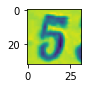

Label for the Image 5


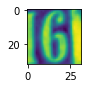

Label for the Image 6


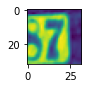

Label for the Image 7


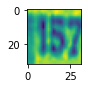

Label for the Image 5


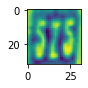

Label for the Image 7


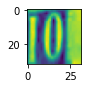

Label for the Image 0


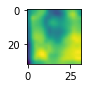

Label for the Image 9


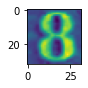

Label for the Image 8


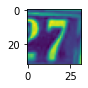

Label for the Image 7


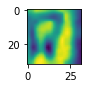

Label for the Image 7


In [108]:
import random

randomList = []
# Set a length of the list to 10
for i in range(0, 10):
    # any random numbers from 0 to 18000(Max of test Data)
    randomList.append(random.randint(0, 18000))

print("Printing list of 10 random numbers")
print(randomList)

count=0
for i in randomList:
  plt.figure(figsize=(1, 1))
  plt.imshow(X_test[i])
  plt.show(True)
  print("Label for the Image",y_test[randomList].argmax(axis=1)[count])
  count=count +1

**Data Validated**, No Mismatch for the random 10 images taken from Entire Test Data.

## 6. Print the classification accuracy metrics (10 points)

In [109]:
from sklearn.metrics import classification_report

target_names = ['0', '1', '2','3','4','5','6','7','8','9']

ClassificationReportBNN = classification_report(y_test.argmax(axis=1), predictionsBNN.argmax(axis=1) ,target_names=target_names)
print(ClassificationReportBNN)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1814
           1       0.80      0.85      0.83      1828
           2       0.87      0.83      0.85      1803
           3       0.77      0.76      0.77      1719
           4       0.86      0.85      0.85      1812
           5       0.80      0.80      0.80      1768
           6       0.83      0.81      0.82      1832
           7       0.87      0.86      0.86      1808
           8       0.77      0.78      0.78      1812
           9       0.84      0.78      0.81      1804

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.82      0.82      0.82     18000



## Overall Observations & Report:

### KNN 

*   KNN is having very poor accuracy than the Neural Network
*   K-NN is time consuming compared to NN.

### Deep Neural Network.

*   Deep Neural Network yields better results and predict very well, just check the sample output. 

*   Classification report shows Almost 82% Accuracy with equal Precission and Recall Value.




---

